# SCHOOL SHOOTING DATA ANAYLSIS

In [1]:
import numpy as np                   # 2D arrays
import matplotlib.pyplot as plt       # for data visualisation
import pandas as pd                   # reading csv file and turning to dataframe
import seaborn as sns                 # for Data visualisation
import glob
import folium
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime
from shapely.geometry import Point
import geopandas as gpd
from google.cloud import bigquery
import contextily as ctx

In [2]:
# importing CSV data and naming as SS
data = pd.read_csv(r"C:\Users\micha\Downloads\archive (12)\School_Shooting_data.csv")
SS = data

In [3]:
# Displaying First 5 Rows of Data
SS.head()

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
0,-75.584900,39.668100,1000.0,2009,William Penn High School,New Castle,Delaware,713 E Basin Rd,suburbtown,BLACK,0,1,1,8-Jan-09,High School,1.000230e+11,8:30PM
1,-87.617500,41.839900,1701.0,2009,Dunbar Vocational Career Academy,Chicago,Illinois,3000 S King Dr,urban,BLACK,0,5,5,9-Jan-09,High School,1.709930e+11,8:00PM
2,-90.165100,38.565700,1712.0,2009,Cahokia High School,Cahokia,Illinois,800 Range Ln,suburbtown,BLACK,1,0,1,23-Jan-09,High School,1.708040e+11,7:20PM
3,-78.311800,35.831500,3713.0,2009,Zebulon Middle School,Zebulon,North Carolina,Halifax Road and New Oak Street,suburbtown,BLACK,0,1,1,11-Feb-09,Middle School,3.704720e+11,6:00AM
4,-83.113977,42.383593,NaN,2009,Central High School,Detroit,Michigan,2425 Tuxedo St,urban,NaN,0,1,1,17-Feb-09,High School,2.601103e+11,2:20PM


In [4]:
# Displaying Last 5 Rows of Data
SS.tail()

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
175,-149.881113,61.213281,200.0,2018,Denali Elementary School,Anchorage,Alaska,952 Cordova St,urban,WHITE,0,1,1,3-Oct-18,Elementary School,2.001800e+10,9:30AM
176,-77.378427,37.471892,5104.0,2018,Varina High School,Henrico,Virginia,7053 Messer Rd,rural,BLACK,0,1,1,7-Oct-18,High School,5.101890e+11,9:30PM
177,-80.691593,35.120282,3709.0,2018,Butler High School,Matthews,North Carolina,1810 Matthews Mint Hill Rd,suburbtown,WHITE,1,0,1,29-Oct-18,High School,3.702970e+11,7:15AM
178,-76.382449,36.826811,5103.0,2018,Simonsdale Elementary School,Portsmouth,Virginia,4841 Clifford St,urban,WHITE,0,1,1,20-Nov-18,Elementary School,5.103000e+11,4:00PM
179,-83.229837,36.784261,2105.0,2018,Cawood Elementary School,Cawood,Kentucky,51 Nola St,rural,WHITE,0,2,2,11-Dec-18,Elementary School,2.102540e+11,9:00PM


In [5]:
SS.isnull()

,LONCOD,LATCOD,CDCODE,year,school,city,state,address,urbanrural,race,killed,injured,victims,date,type,NCESSCH,time
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
# Checking for Duplicates and Amount if any
SS.duplicated().sum()

0

In [7]:
SS.shape

(180, 17)

In [8]:
SS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LONCOD      177 non-null    float64
 1   LATCOD      177 non-null    float64
 2   CDCODE      169 non-null    float64
 3   year        180 non-null    int64  
 4   school      180 non-null    object 
 5   city        180 non-null    object 
 6   state       180 non-null    object 
 7   address     180 non-null    object 
 8   urbanrural  177 non-null    object 
 9   race        173 non-null    object 
 10  killed      180 non-null    int64  
 11  injured     180 non-null    int64  
 12  victims     180 non-null    int64  
 13  date        180 non-null    object 
 14  type        180 non-null    object 
 15  NCESSCH     175 non-null    float64
 16  time        174 non-null    object 
dtypes: float64(4), int64(4), object(9)
memory usage: 24.0+ KB


In [9]:
SS.isna().sum()

LONCOD         3
LATCOD         3
CDCODE        11
year           0
school         0
city           0
state          0
address        0
urbanrural     3
race           7
killed         0
injured        0
victims        0
date           0
type           0
NCESSCH        5
time           6
dtype: int64

In [10]:
SS.fillna("Unknown", inplace=True)

In [11]:
SS.columns

Index(['LONCOD', 'LATCOD', 'CDCODE', 'year', 'school', 'city', 'state',
       'address', 'urbanrural', 'race', 'killed', 'injured', 'victims', 'date',
       'type', 'NCESSCH', 'time'],
      dtype='object')

In [12]:
# Checking the Minimum year
SS["year"].min()

2009

In [13]:
# Checking the Maximum year in data
SS["year"].max()

2018

In [14]:
SS["year"].mean()

2014.6944444444443

# YEARLY TRENDS OF INCIDENTS

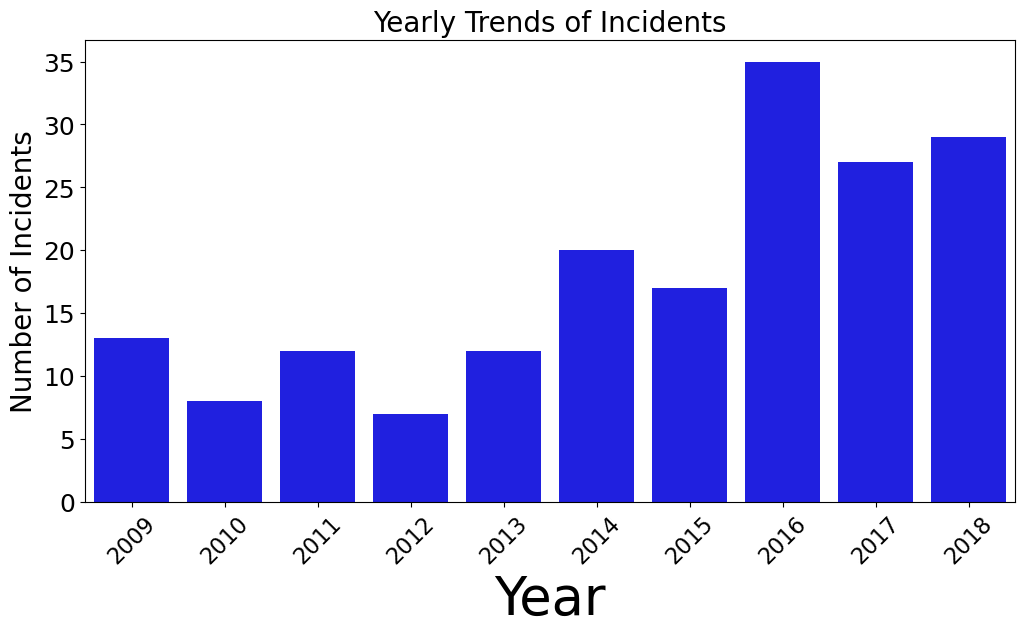

In [15]:
# Grouping by 'year' and counting number of incidents
incidents_per_year = SS.groupby('year').size()

# Creating a bar plot to visualize the data
plt.figure(figsize=(12,6))
sns.barplot(x=incidents_per_year.index, y=incidents_per_year.values, color='b')
plt.xlabel('Year', fontsize=38)
plt.ylabel('Number of Incidents', fontsize=20)
plt.title('Yearly Trends of Incidents', fontsize=20)
plt.xticks(rotation=45)
plt.yticks(fontsize=18)
plt.xticks(fontsize=16)
plt.show()

# SCATTER PLOT OF INCIDENT LOCATIONS

In [16]:
# Converting 'Unknown' to NaN (for both columns)
SS['LONCOD'].replace('Unknown', np.nan, inplace=True)
SS['LATCOD'].replace('Unknown', np.nan, inplace=True)

# Converting the columns to numeric, forcing non-numeric values to NaN
SS['LONCOD'] = pd.to_numeric(SS['LONCOD'], errors='coerce')
SS['LATCOD'] = pd.to_numeric(SS['LATCOD'], errors='coerce')

# Dropping the rows with NaN values in these columns
SS.dropna(subset=['LONCOD', 'LATCOD'],inplace=True)

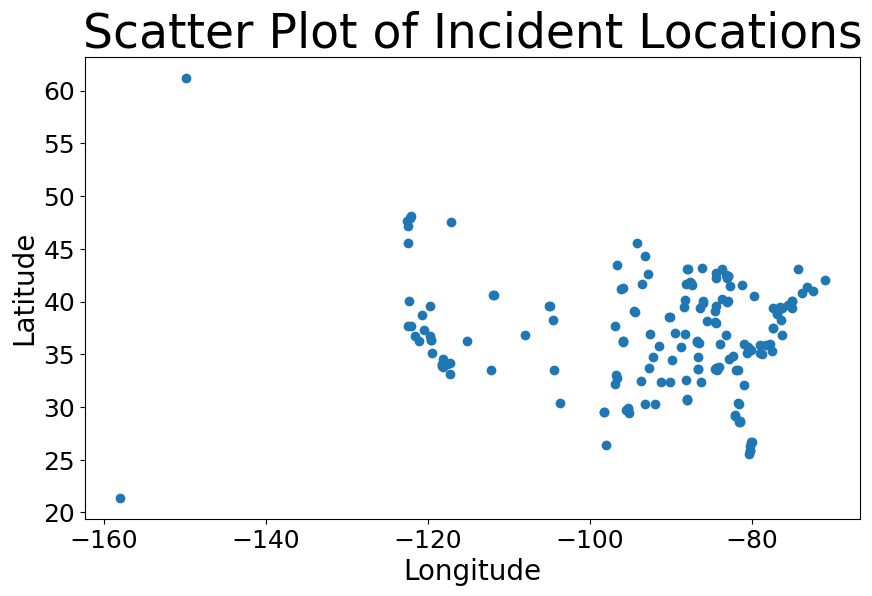

In [17]:
# creating the figure and axes, and scatter the longitude and latitude data on the axes
plt.figure(figsize=(10,6))
plt.scatter(SS['LONCOD'], SS['LATCOD'])
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.title("Scatter Plot of Incident Locations", fontsize=34)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

# visualizing the plot
plt.show()

# Geospatial Scatter Plot of Incident Locations

In [18]:
# Creating a geodataframe
# Note your current dataframe is named as SS
geometry = [Point(xy) for xy in zip(SS.LONCOD, SS.LATCOD)]
geo_df = gpd.GeoDataFrame(SS, geometry=geometry)


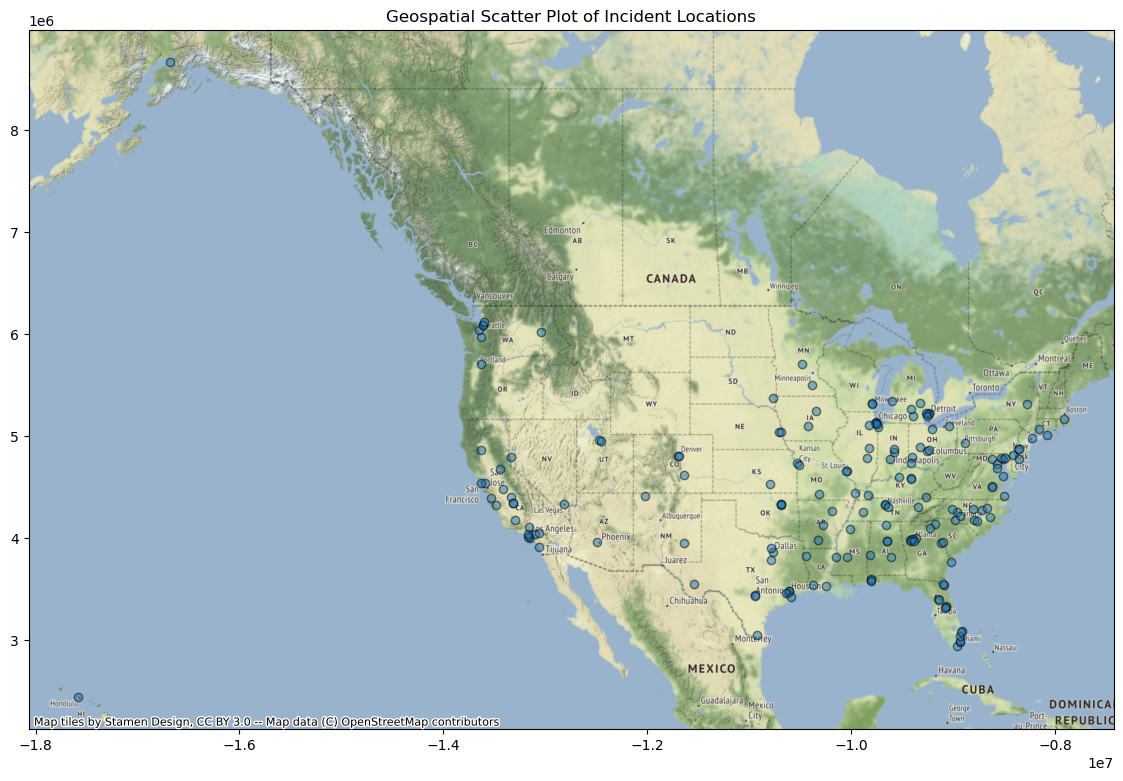

In [19]:
geo_df = geo_df.set_crs(epsg=4326)
geo_df = geo_df.to_crs(epsg=3857)

ax = geo_df.plot(figsize=(14, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)
plt.title("Geospatial Scatter Plot of Incident Locations")
plt.show()

# Comparison of Number of Incidents by State

In [20]:
# Grouping by 'state' and count
incidents_per_state = SS.groupby('state').size()

# Sorting the values
incidents_per_state = incidents_per_state.sort_values(ascending=False)


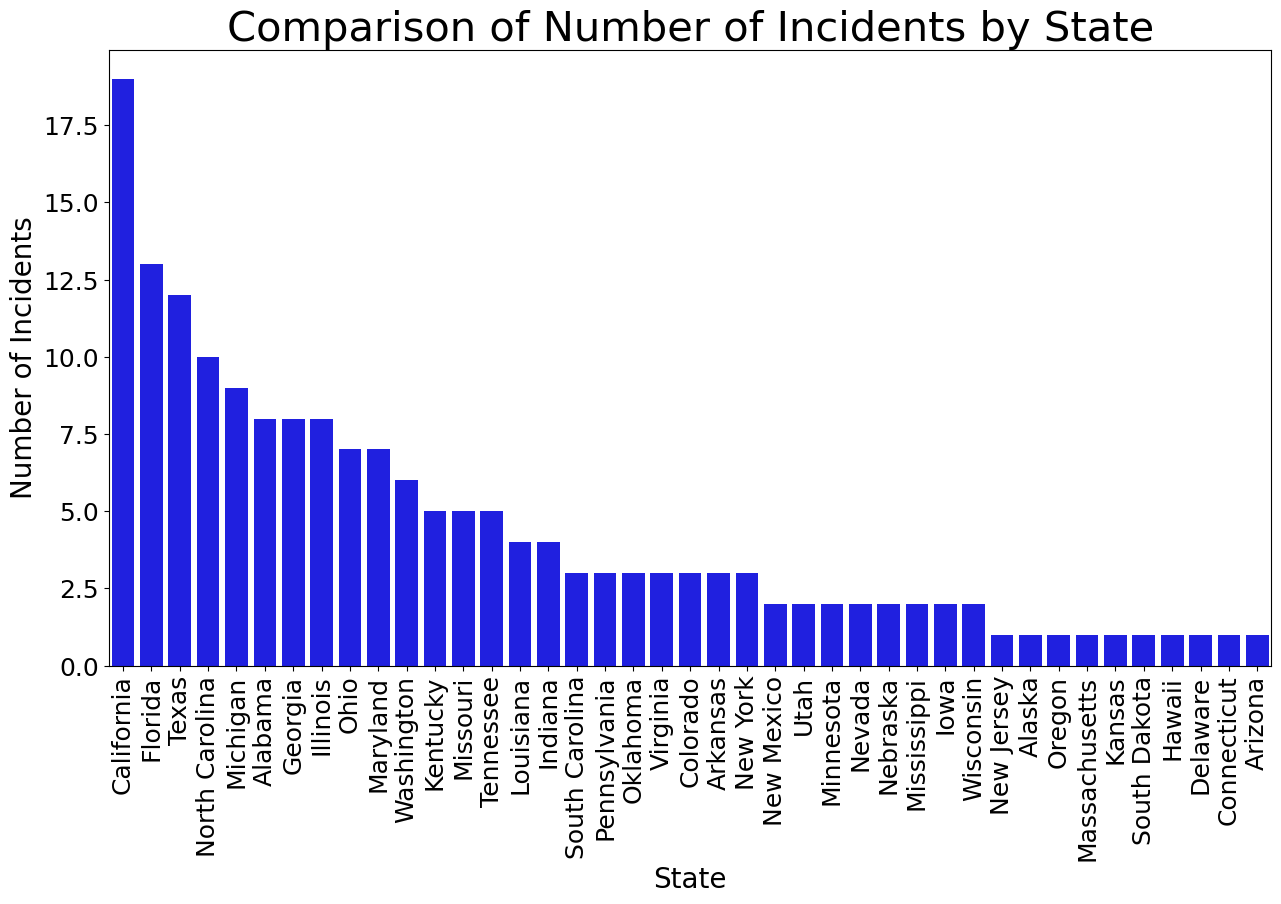

In [21]:
# Visualization
plt.figure(figsize=(15,8))
sns.barplot(x=incidents_per_state.index, y=incidents_per_state.values, color='b')
plt.xlabel('State', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.title('Comparison of Number of Incidents by State', fontsize=30)
plt.xticks(rotation=90)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.show()

# Comparison of Number of Victims by State

In [22]:
# Sum of victims by 'state' (or 'city')
victims_per_state = SS.groupby('state')['victims'].sum()

# Sorting the values
victims_per_state = victims_per_state.sort_values(ascending=False)


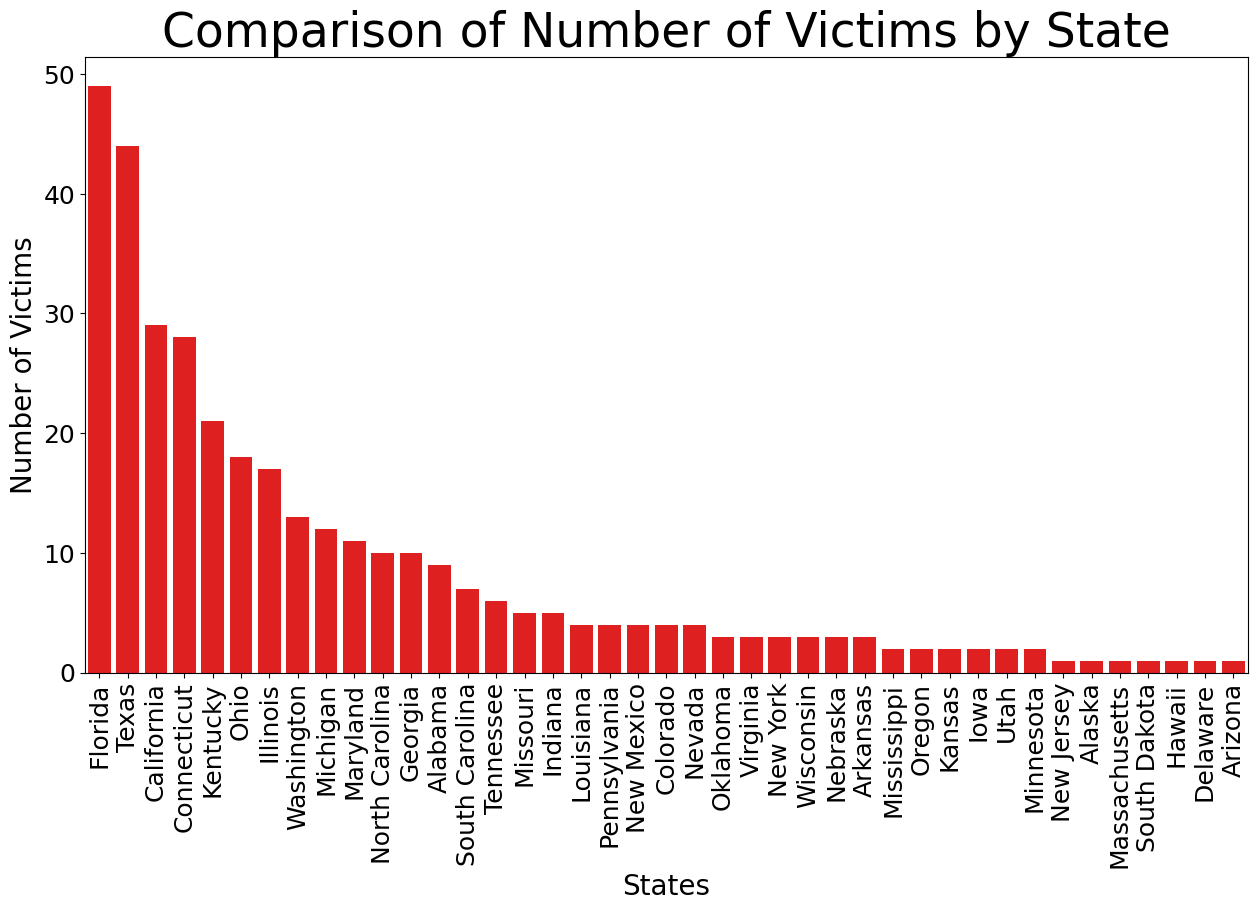

In [23]:
# Visualization
plt.figure(figsize=(15,8))
sns.barplot(x=victims_per_state.index, y=victims_per_state.values, color='r')
plt.xlabel('States', fontsize=20)
plt.ylabel('Number of Victims', fontsize=20)
plt.title('Comparison of Number of Victims by State', fontsize=34)
plt.xticks(rotation=90)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

# Distribution of Injured/Killed Ratios

In [24]:
# Avoiding division by zero
SS.loc[SS['killed']==0, 'killed'] = np.nan

# Calculating ratio and create a new column
SS['Injured_Killed_Ratio'] = SS['injured'] / SS['killed']

# Dropping the NaN rows for the visualization 
SS_ratio = SS.dropna(subset=['Injured_Killed_Ratio'])


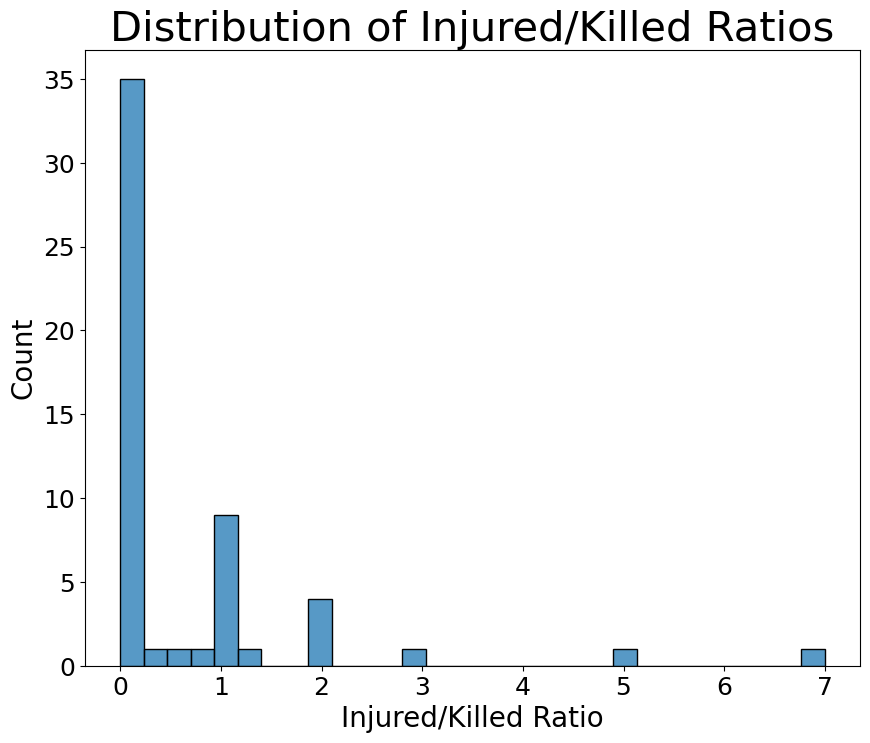

In [25]:
# Visualization of Distribution of Injured/Killed Ratios
plt.figure(figsize=(10,8))
sns.histplot(SS_ratio['Injured_Killed_Ratio'], kde=False, bins=30)
plt.xlabel('Injured/Killed Ratio', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Distribution of Injured/Killed Ratios', fontsize=30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [26]:
# Printing the unique values of 'time' column to check for any anomalies
print(SS['time'].unique())

# Printing the first 10 rows of 'time' column
print(SS['time'].head(10))

['8:30PM' '8:00PM' '7:20PM' '6:00AM' '2:20PM' '10:00PM' '7:40PM' '8:02AM'
 '8:00AM' '1:50PM' '4:48PM' '8:20AM' '3:00PM' '1:45PM' '1:00PM' '7:30AM'
 '7:50AM' '12:00PM' '12:50PM' '10:40AM' '7:00AM' '6:30PM' '10:35AM'
 '6:30AM' 'Unknown' '4:45PM' '12:30PM' '1:30PM' '2:00PM' '10:45AM'
 '9:30AM' '9:00AM' '8:45PM' '10:30PM' '1:15PM' '12:33PM' '7:00PM' '8:11AM'
 '3:30PM' '10:51PM' '10:30AM' '11:15PM' '9:30PM' '4:30PM' '3:53PM'
 '8:15PM' '12:51PM' '7:40AM' '4:00PM' '2:45PM' '7:30PM' '9:35PM' '10:15PM'
 '6:55PM' '10:00AM' '9:55PM' '12:45PM' '8:10PM' '12:44PM' '11:15AM'
 '2:25PM' '5:00PM' '8:30AM' '10:50PM' '7:35PM' '12:00AM' '9:33PM' '1:45AM'
 '9:15PM' '9:20PM' '2:30PM' '9:45PM' '3:45PM' '2:40PM' '11:27PM' '3:17PM'
 '12:35PM' '9:00PM' '7:15PM' '7:35AM' '6:20PM' '11:01AM' '10:27AM'
 '9:05AM' '11:30AM' '8:04AM' '8:57AM' '3:51PM' '8:55AM' '5:15PM' '7:55AM'
 '11:00AM' '5:30PM' '8:39AM' '5:00AM' '6:00PM' '8:38PM' '7:15AM']
0     8:30PM
1     8:00PM
2     7:20PM
3     6:00AM
4     2:20PM
5    10:00PM

In [27]:
# Converting 'Unknown' to NaN
SS['time'].replace('Unknown', np.nan, inplace=True)
SS.dropna(subset=['time'],inplace=True)

# Converting 'time' column to datetime and extract the hour
SS['hour'] = pd.to_datetime(SS['time'], format='%I:%M%p', errors='coerce').dt.hour

# Counting incidents in each hour
incidents_per_hour = SS.groupby('hour').size()

# Sorting by index (hour)
incidents_per_hour = incidents_per_hour.sort_index()

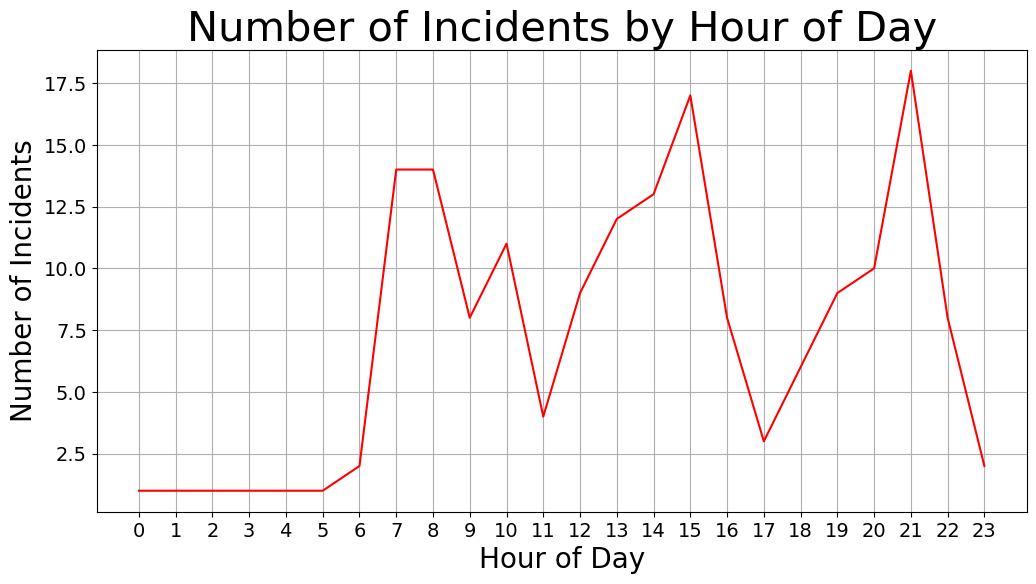

In [28]:
# Visualization of Number of Incidents by Hour of Day
plt.figure(figsize=(12,6))
sns.lineplot(x = incidents_per_hour.index, y = incidents_per_hour.values, color='r')
plt.xlabel('Hour of Day', fontsize=20)
plt.ylabel('Number of Incidents', fontsize=20)
plt.title('Number of Incidents by Hour of Day', fontsize=30)
plt.xticks(range(24)) # this line is to display all 24 hours on the x-axis
plt.grid(True)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.show()